In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import scipy.io as sp
import matplotlib.transforms as transforms

# Load Data

In [2]:
pred = ["P(A1)", "P(A2)", "P(A3)", "P(¬A1)", "P(¬A2)", "P(¬A3)",
       "P(A2|A1)","P(A2|¬A1)","P(¬A2|A1)","P(¬A2|¬A1)", 
        "P(A1 ∩ A2)", "P(A1 ∩ ¬A2)","P(¬A1 ∩ A2)","P(¬A1 ∩ ¬A2)", 
        "P(A1 ∪ A2)", "P(A1 ∪ ¬A2)", "P(¬A1 ∪ A2)", "P(¬A1 ∪ ¬A2)", 
        "P(A3|A2)", "P(A3|¬A2)", "P(¬A3|A2)", "P(¬A3|¬A2)",
        "P(A2 ∩ A3)", "P(A2 ∩ ¬A3)", "P(¬A2 ∩ A3)","P(¬A2 ∩ ¬A3)", 
       "P(A2 ∪ A3)", "P(A2 ∪ ¬A3)", "P(¬A2 ∪ A3)", "P(¬A2 ∪ ¬A3)", 
        "P(A1|A3)", "P(A1|¬A3)", "P(¬A1|A3)", "P(¬A1|¬A3)",
       "P(A3 ∩ A1)", "P(A3 ∩ ¬A1)", "P(¬A3 ∩ A1)", "P(¬A3 ∩ ¬A1)", 
        "P(A3 ∪ A1)", "P(A3 ∪ ¬A1)", "P(¬A3 ∪ A1)", "P(¬A3 ∪ ¬A1)", 
        "P(A1|A2)", "P(¬A1|A2)", "P(A1|¬A2)", "P(¬A1|¬A2)", 
       "P(A2 ∩ A1)", "P(¬A2 ∩ A1)", "P(A2 ∩ ¬A1)", "P(¬A2 ∩ ¬A1)", 
        "P(A2 ∪ A1)", "P(¬A2 ∪ A1)", "P(A2 ∪ ¬A1)", "P(¬A2 ∪ ¬A1)", 
        "P(A2|A3)", "P(¬A2|A3)", "P(A2|¬A3)", "P(¬A2|¬A3)", 
        "P(A3 ∩ A2)", "P(¬A3 ∩ A2)", "P(A3 ∩ ¬A2)", "P(¬A3 ∩ ¬A2)",
       "P(A3 ∪ A2)", "P(¬A3 ∪ A2)", "P(A3 ∪ ¬A2)", "P(¬A3 ∪ ¬A2)", "P(A3|A1)", "P(¬A3|A1)", "P(A3|¬A1)", 
        "P(¬A3|¬A1)", "P(A1 ∩ A3)", "P(¬A1 ∩ A3)", "P(A1 ∩ ¬A3)", "P(¬A1 ∩ ¬A3)", 
       "P(A1 ∪ A3)", "P(¬A1 ∪ A3)", "P(A1 ∪ ¬A3)", "P(¬A1 ∪ ¬A3)"]

In [3]:
pred_new = []
for p in pred:
    p = p.replace("A1","A")
    p = p.replace("A2","B")
    p = p.replace("A3","C")
    pred_new.append(p)
pred = pred_new

In [4]:
zn = [(["P(A)","P(B)", "P(A ∩ B)", "P(A ∪ B)"],["+", "-", "-"]),(["P(A)","P(B ∩ ¬A)", "P(B)", "P(A ∩ ¬B)"],["+", "-", "-"]),(["P(A)","P(B ∩ ¬A)","P(A ∪ B)"],["+","-"]),
     (["P(B)","P(A ∩ ¬B)","P(A ∪ B)"],["+","-"]),(["P(A ∩ ¬B)","P(A ∩ B)","P(A)"],["+","-"]),(["P(B ∩ ¬A)","P(A ∩ B)","P(B)"],["+","-"]),
     (["P(A ∩ ¬B)","P(B ∩ ¬A)", "P(A ∩ B)", "P(A ∪ B)"],["+", "+", "-"]),(["P(A ∩ ¬B)","P(B ∩ ¬A)", "P(A ∩ B)", "P(A)", "P(B)"],["+", "+2*", "-", "-"]),
    (["P(A|B)","P(B)", "P(B|A)", "P(A)"],["*", "-", "*"]), (["P(A|B)","P(B)", "P(A|¬B)", "P(¬B)", "P(A)"],["*", "+", "*", "-"]), 
    (["P(B|A)","P(A)", "P(B|¬A)", "P(¬A)", "P(B)"],["*", "+", "*", "-"]), (["P(B|A)","P(A)", "P(A|¬B)", "P(¬B)", "P(A)"],["*", "+", "*", "-"]), 
    (["P(A|B)","P(B)", "P(B|¬A)", "P(¬A)", "P(B)"],["*", "+", "*", "-"]),(["P(A|¬B)", "P(¬B)", "P(B)", "P(B|¬A)", "P(¬A)", "P(A)"],["*", "+", "-", "*", "-"]),
    (["P(A ∩ B)", "P(A|B)", "P(B)"],["-", "*"]),(["P(A ∩ B)", "P(B|A)", "P(A)"],["-", "*"]),(["P(A ∩ B)", "P(A)", "P(A|¬B)", "P(¬B)"],["-", "+", "*"]),
    (["P(A ∩ B)", "P(B)", "P(B|¬A)", "P(¬A)"],["-", "+", "*"])]

In [5]:
mean_tab = pd.read_csv("mean_tab.csv", index_col = "Unnamed: 0")

In [6]:
identity_plot_tab = {"tab":{}}
for pair in mean_tab["pair"].unique():
    identity_plot_tab["tab"][pair] = {}
    for m in mean_tab["type"].unique():
        model_tab = mean_tab[mean_tab["pair"] == pair]
        model_tab = model_tab[model_tab["type"] == m]
        identity_plot_tab["tab"][pair][m] = model_tab

# Make Identity Plots

In [7]:
# This method is to effectively compute identity for each pair, by changing names A,B,C to the specific pair name. 
# Note the identities are the same regardless of the order of A, B (the reverse identity is also computed among the 18).
def replace_name(zname, pair, order):
    zname = zname.replace("P(", "")
    zname = zname.replace(")", "")
    if "∩" in zname:
        zname_swap = zname.replace(" ", "")
        swap_list = zname_swap.split("∩")
        swap_list.append("∩")
    if "∪" in zname:
        zname_swap = zname.replace(" ", "")
        swap_list = zname_swap.split("∪") 
        swap_list.append("∪")
    if "1" in pair and "2" in pair:
        if order == 0:
            #Swapping A and B order if reverse in conj and disj (we do it this way because of not operator)
            zname = swap_list[1] + " " + swap_list[2] + " " + swap_list[0]
    if "1" in pair and "3" in pair:
        if order == 1:
            zname = zname.replace("B", "C")
        else:
            zname = swap_list[1] + " " + swap_list[2] + " " + swap_list[0]
            zname = zname.replace("B", "C")
    elif "2" in pair and "3" in pair:
        if order == 1:
            zname = zname.replace("B", "C")
            zname = zname.replace("A", "B")
        else:
            zname = swap_list[1] + " " + swap_list[2] + " " + swap_list[0]
            zname = zname.replace("B", "C")
            zname = zname.replace("A", "B")
    return zname

In [8]:
#We need to average out the two conjunctions/disjunctions in two different orders when computing Identities. 
#For models, the two conj/disj have the same prediction, but for data the two orders are slightly off.
def compute_average(zname, pair, p_tab):
    original_order = replace_name(zname,pair,1)
    reverse_order = replace_name(zname,pair,0)
    mp_tab_o = p_tab[p_tab["pred"] == original_order]
    mp_tab_r = p_tab[p_tab["pred"] == reverse_order]
    r_o = np.array(mp_tab_o["rating"])[0]/100
    r_r = np.array(mp_tab_r["rating"])[0]/100
    r = (r_o + r_r)/2
    return r

In [9]:
def get_z_tab(zn, model_data):
    z_tab = {"subject": [],"rating": [], "type": [], "pred": [], "pair":[]}
    for pair in mean_tab["pair"].unique():
        print("")
        print("")
        print(pair)
        model_preds = model_data["tab"][pair].keys()
        for m in model_preds:
            print("")
            print(m)
            m_tab = model_data["tab"][pair][m]
            #index for identity
            j = 1
            for z in zn:
                print("Z" + str(j))
                for p in m_tab["subject"].unique():
                    p_tab = m_tab[m_tab["subject"] == p]
                    #Check whether conjunction or disjunction
                    if ("∩" in z[0][0]) or ("∪" in z[0][0]):
                        r = compute_average(z[0][0], pair, p_tab)
                        z_val = str(r)
                    else:
                        mp_tab = p_tab[p_tab["pred"] == replace_name(z[0][0], pair, 1)]
                    #string that represents the numerical calculation to be evaluated for the identity
                        z_val = str(np.array(mp_tab["rating"])[0]/100)
                    #Loop through the identity calculations (z[0] are the probabilities and z[1] are the operations)
                    for i in range(1,len(z[0])):
                        if ("∩" in z[0][i]) or ("∪" in z[0][i]):
                            r = compute_average(z[0][i], pair, p_tab)
                        else:
                            mp_tab = p_tab[p_tab["pred"] == replace_name(z[0][i], pair, 1)]
                            r = np.array(mp_tab["rating"])[0]/100
                        op = z[1][i-1]
                        #first add the operation, then add the probability, because we already have z[0][0]
                        z_val += op + str(r)
                    z_tab["subject"].append(p)
                    z_tab["rating"].append(100*eval(z_val))
                    z_tab["type"].append(m)
                    z_tab["pred"].append("Z"+str(j))
                    z_tab["pair"].append(pair)
                j += 1
    return pd.DataFrame(z_tab)

In [10]:
z_tab = get_z_tab(zn, identity_plot_tab)



A1_A2

data
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

BS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

QSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

CSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

RF
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18


A1_A3

data
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

BS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

QSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

CSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

RF
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18


A2_A3

data
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

BS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

QSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

CSS
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z8
Z9
Z10
Z11
Z12
Z13
Z14
Z15
Z16
Z17
Z18

RF
Z1
Z2
Z3
Z4
Z5
Z6
Z7
Z

In [11]:
z_tab.to_csv("z_tab.csv")

In [12]:
def zpm_tab(z_tab, pair, model):
    zp_tab = z_tab[z_tab["pair"] == pair]
    return zp_tab[zp_tab["type"] == model]

In [13]:
def mean_rating(z_tab, pair, model, pred):
    mean_tab = zpm_tab(z_tab, pair, model)
    rating_list = []
    for p in pred:
        mean_tab_p = mean_tab[mean_tab["pred"] == p]
        rating_list.append(np.mean(mean_tab_p["rating"]))
    return rating_list

In [14]:
identities = z_tab["pred"].unique()

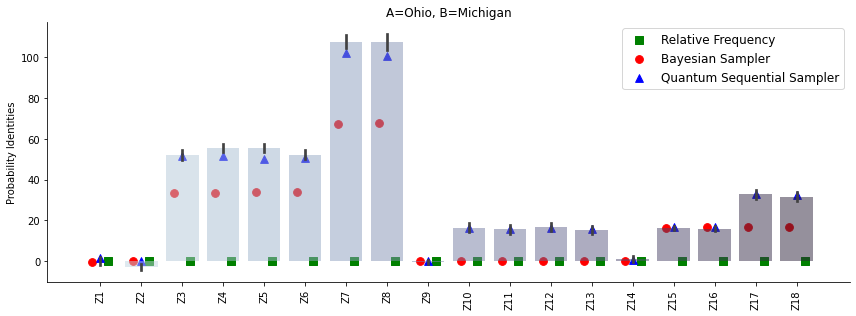

In [15]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "A1_A2", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "A1_A2", "RF", identities), marker = "s", color = "green", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "A1_A2", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "A1_A2", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=Ohio, B=Michigan")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_A1_A2.jpg", dpi = 500)

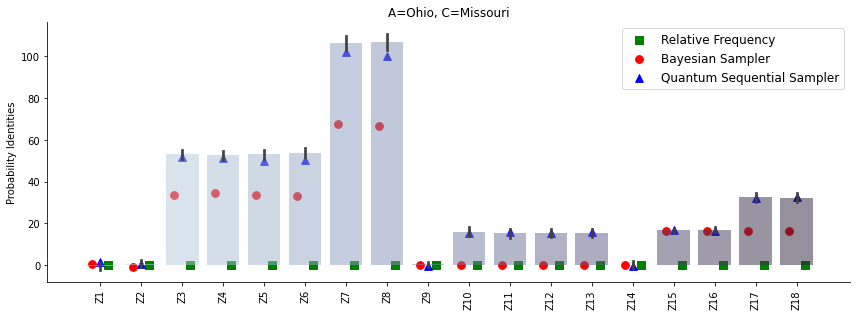

In [16]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "A1_A3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "A1_A3", "RF", identities), marker = "s", color = "green", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "A1_A3", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "A1_A3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=Ohio, C=Missouri")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_A1_A3.jpg", dpi = 500)

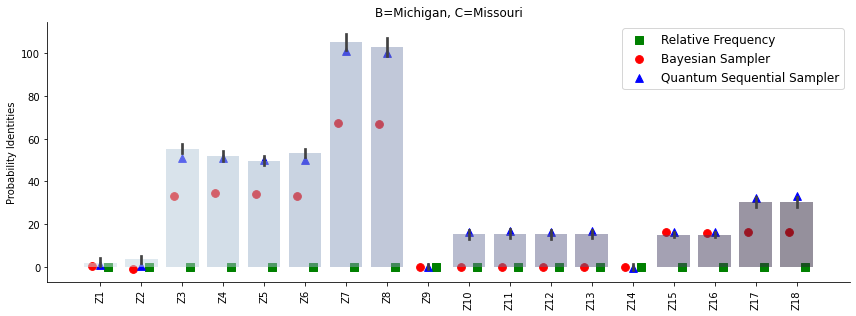

In [17]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "A2_A3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "A2_A3", "RF", identities), marker = "s", color = "green", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "A2_A3", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "A2_A3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("B=Michigan, C=Missouri")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_A2_A3.jpg", dpi = 500)

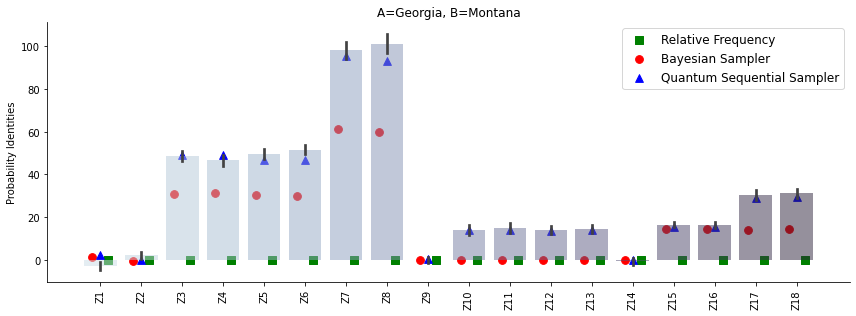

In [18]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "B1_B2", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "B1_B2", "RF", identities), marker = "s", color = "green", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "B1_B2", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "B1_B2", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=Georgia, B=Montana")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_B1_B2.jpg", dpi = 500)

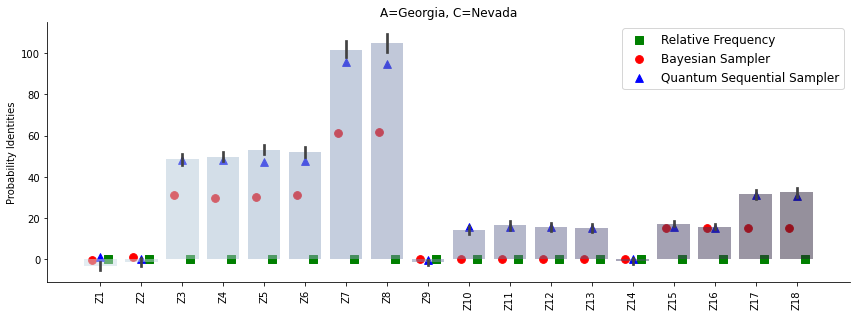

In [19]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "B1_B3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "B1_B3", "RF", identities), marker = "s", color = "green", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "B1_B3", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "B1_B3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("A=Georgia, C=Nevada")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_B1_B3.jpg", dpi = 500)

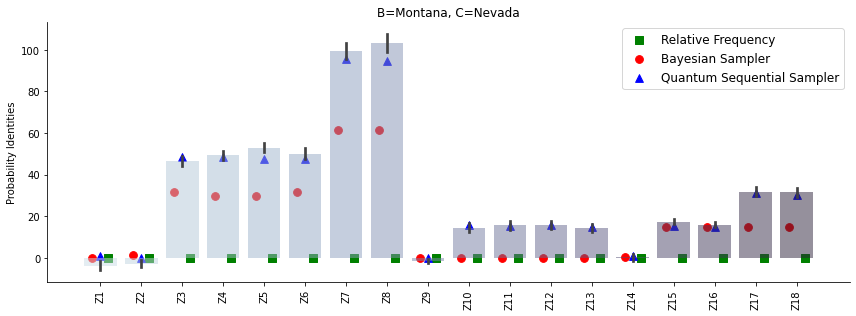

In [20]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "B2_B3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "B2_B3", "RF", identities), marker = "s", color = "green", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Relative Frequency", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "B2_B3", "BS", identities), marker = "o", color = "red", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Bayesian Sampler",transform=trans+offset(-8))
plt.scatter(identities, mean_rating(z_tab, "B2_B3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler")
plt.title("B=Montana, C=Nevada")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("Z_B2_B3.jpg", dpi = 500)

# CSS vs QSS

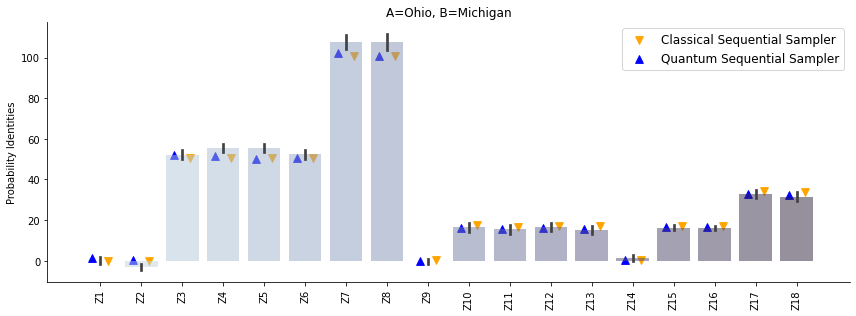

In [21]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "A1_A2", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "A1_A2", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "A1_A2", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Ohio, B=Michigan")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("CQSS/Z_A1_A2_CQSS.jpg", dpi = 500)

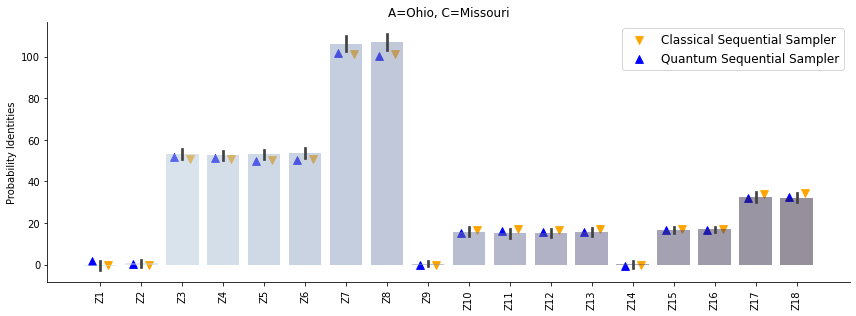

In [22]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "A1_A3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "A1_A3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "A1_A3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Ohio, C=Missouri")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("CQSS/Z_A1_A3_CQSS.jpg", dpi = 500)

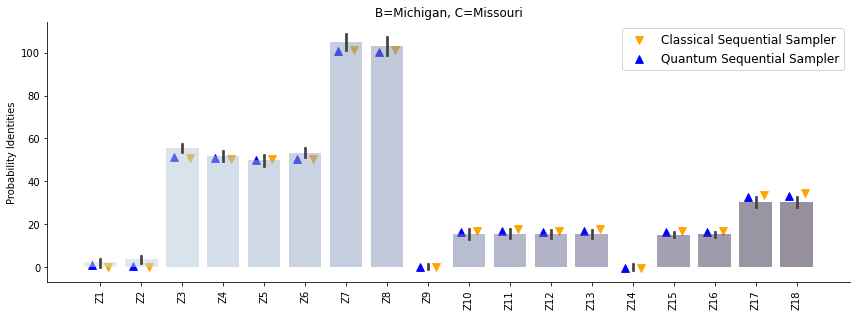

In [23]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "A2_A3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "A2_A3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "A2_A3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("B=Michigan, C=Missouri")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("CQSS/Z_A2_A3_CQSS.jpg", dpi = 500)

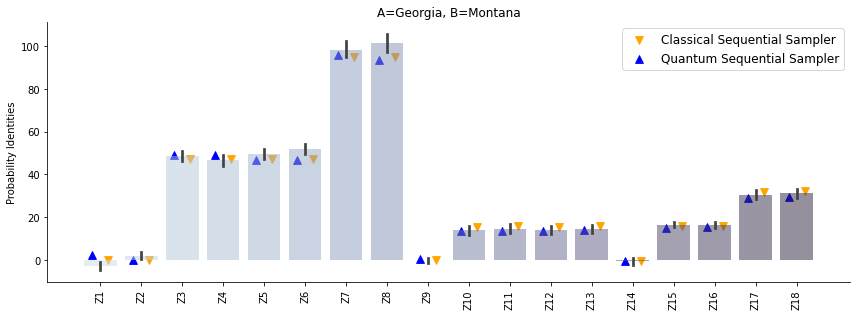

In [24]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "B1_B2", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "B1_B2", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "B1_B2", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Georgia, B=Montana")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("CQSS/Z_B1_B2_CQSS.jpg", dpi = 500)

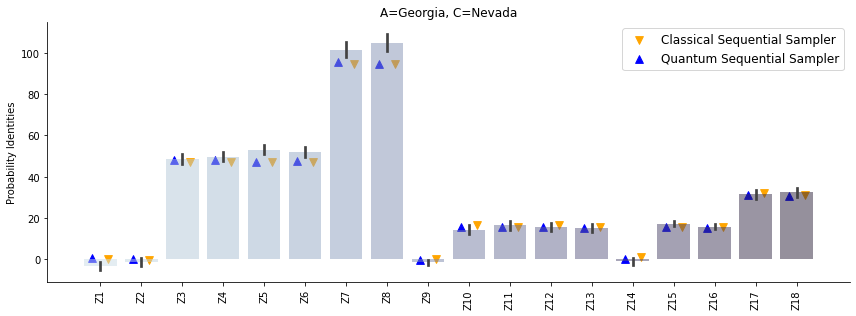

In [25]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "B1_B3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "B1_B3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "B1_B3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Georgia, C=Nevada")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("CQSS/Z_B1_B3_CQSS.jpg", dpi = 500)

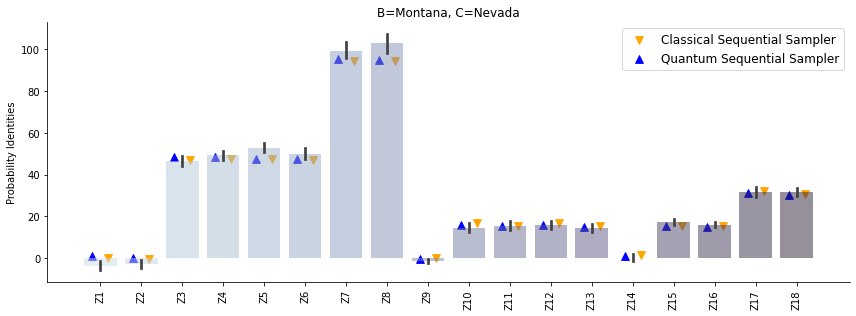

In [26]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(z_tab, "B2_B3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(z_tab, "B2_B3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(z_tab, "B2_B3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("B=Montana, C=Nevada")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("CQSS/Z_B2_B3_CQSS.jpg", dpi = 500)

## Two Sigma Participants

In [27]:
two_sig_p = sp.loadmat("2sig_participant.mat")['participant_list'][0: 1162,:]
two_sig_p = two_sig_p.flatten()
two_sig_p = np.subtract(two_sig_p,1) #matlab is one indexing

In [28]:
two_sig_tab = z_tab[z_tab["subject"].isin(two_sig_p)]

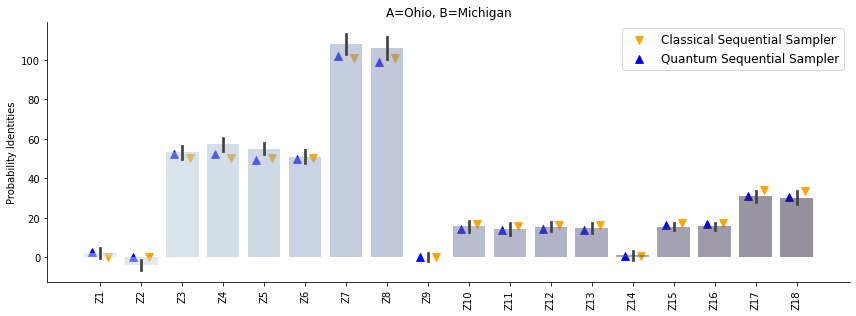

In [29]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(two_sig_tab, "A1_A2", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(two_sig_tab, "A1_A2", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(two_sig_tab, "A1_A2", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Ohio, B=Michigan")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("twosig/Z_A1_A2_twosig.jpg", dpi = 500)

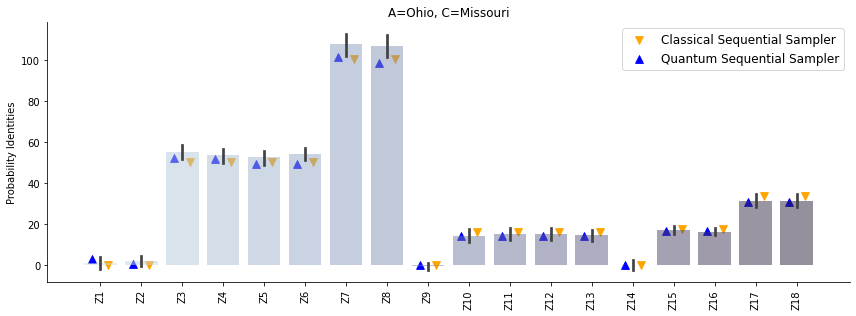

In [30]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(two_sig_tab, "A1_A3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(two_sig_tab, "A1_A3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(two_sig_tab, "A1_A3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Ohio, C=Missouri")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("twosig/Z_A1_A3_twosig.jpg", dpi = 500)

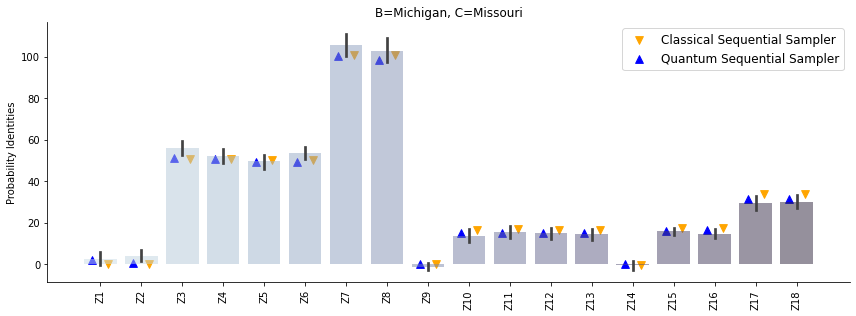

In [31]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(two_sig_tab, "A2_A3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(two_sig_tab, "A2_A3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(two_sig_tab, "A2_A3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("B=Michigan, C=Missouri")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("twosig/Z_A2_A3_twosig.jpg", dpi = 500)

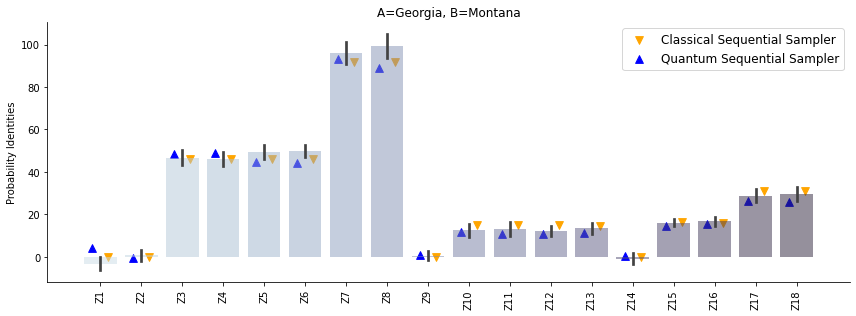

In [32]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(two_sig_tab, "B1_B2", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(two_sig_tab, "B1_B2", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(two_sig_tab, "B1_B2", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Georgia, B=Montana")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("twosig/Z_B1_B2_twosig.jpg", dpi = 500)

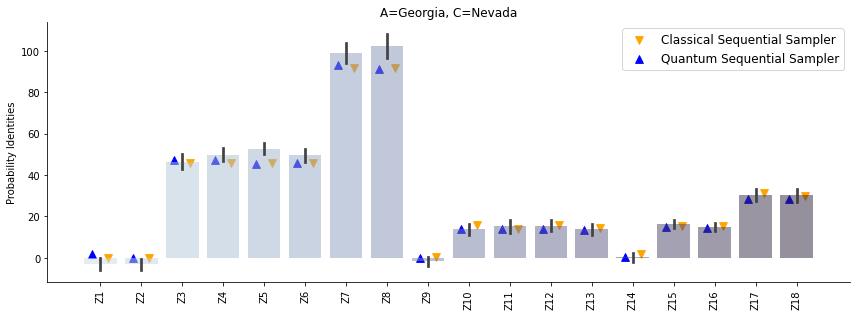

In [33]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(two_sig_tab, "B1_B3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(two_sig_tab, "B1_B3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(two_sig_tab, "B1_B3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Georgia, C=Nevada")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("twosig/Z_B1_B3_twosig.jpg", dpi = 500)

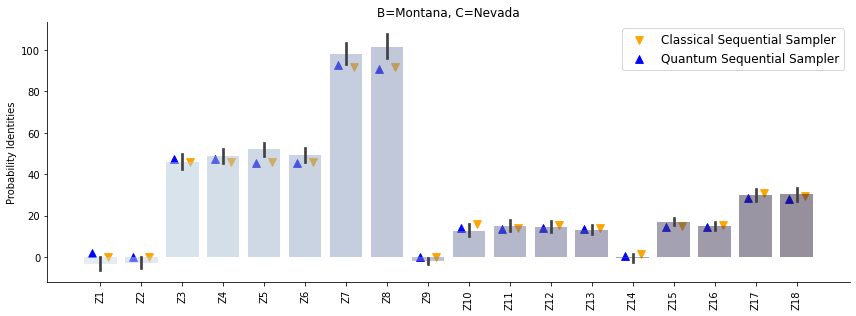

In [34]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(two_sig_tab, "B2_B3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(two_sig_tab, "B2_B3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(two_sig_tab, "B2_B3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("B=Montana, C=Nevada")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("twosig/Z_B2_B3_twosig.jpg", dpi = 500)

## Four Sigma Participants

In [35]:
four_sig_p = sp.loadmat("4sig_participant.mat")['participant_list'][0: 1162,:]
four_sig_p = four_sig_p.flatten()
four_sig_p = np.subtract(four_sig_p,1) #matlab is one indexing

In [36]:
four_sig_tab = z_tab[z_tab["subject"].isin(four_sig_p)]

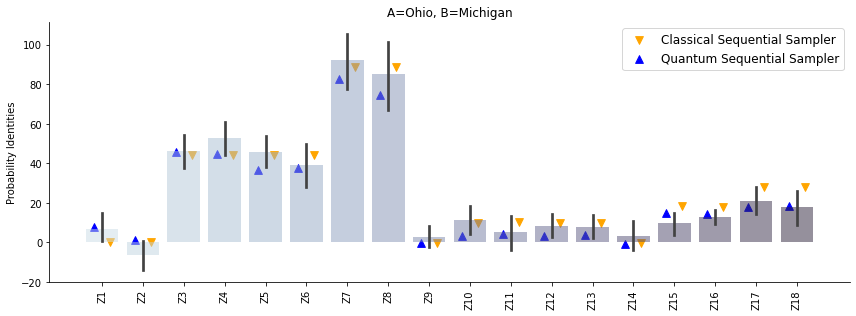

In [37]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(four_sig_tab, "A1_A2", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(four_sig_tab, "A1_A2", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(four_sig_tab, "A1_A2", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Ohio, B=Michigan")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("foursig/Z_A1_A2_foursig.jpg", dpi = 500)

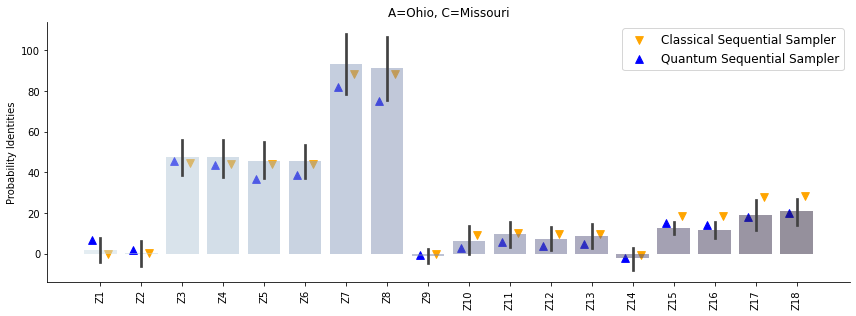

In [38]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(four_sig_tab, "A1_A3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(four_sig_tab, "A1_A3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(four_sig_tab, "A1_A3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Ohio, C=Missouri")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("foursig/Z_A1_A3_foursig.jpg", dpi = 500)

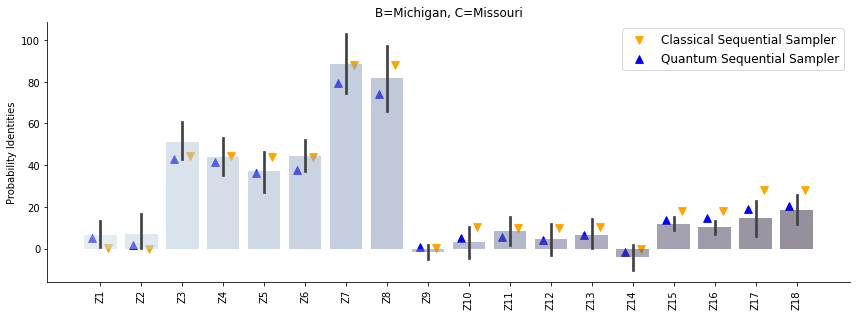

In [39]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(four_sig_tab, "A2_A3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(four_sig_tab, "A2_A3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(four_sig_tab, "A2_A3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("B=Michigan, C=Missouri")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("foursig/Z_A2_A3_foursig.jpg", dpi = 500)

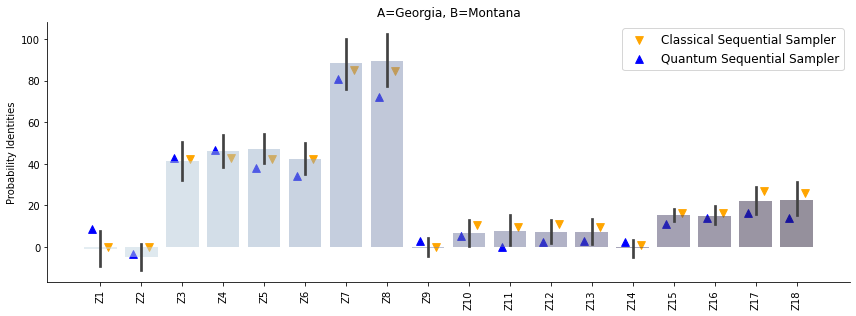

In [40]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(four_sig_tab, "B1_B2", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(four_sig_tab, "B1_B2", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(four_sig_tab, "B1_B2", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Georgia, B=Montana")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("foursig/Z_B1_B2_foursig.jpg", dpi = 500)

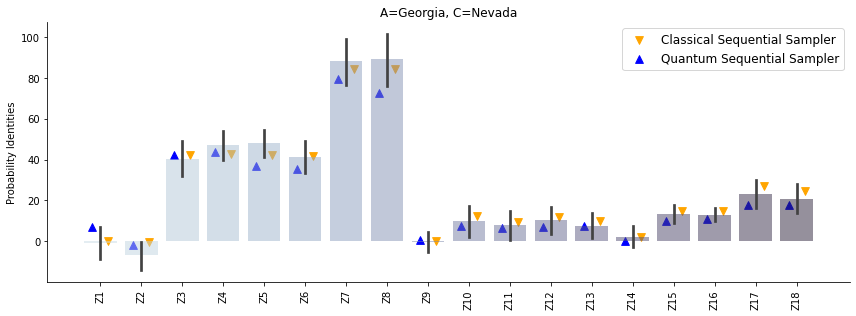

In [41]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(four_sig_tab, "B1_B3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(four_sig_tab, "B1_B3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(four_sig_tab, "B1_B3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("A=Georgia, C=Nevada")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("foursig/Z_B1_B3_foursig.jpg", dpi = 500)

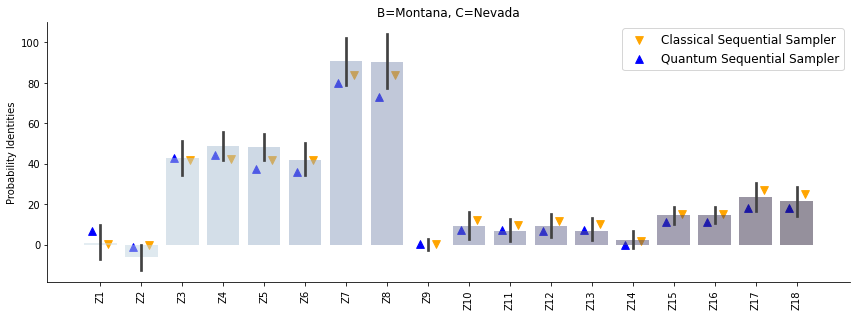

In [42]:
plt.rcParams["figure.figsize"] = (12,4.5)
offset = lambda p: transforms.ScaledTranslation(p/72.,0, plt.gcf().dpi_scale_trans)
trans = plt.gca().transData
ax = sns.barplot(x="pred", y="rating", data=zpm_tab(four_sig_tab, "B2_B3", "data"), 
                 alpha=0.5, palette = "ch:s=.25,rot=-.25", ci = 95)
plt.scatter(identities, mean_rating(four_sig_tab, "B2_B3", "CSS", identities), marker = "v", color = "orange", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Classical Sequential Sampler", transform=trans+offset(8))
plt.scatter(identities, mean_rating(four_sig_tab, "B2_B3", "QSS", identities), marker = "^", color = "blue", 
            s = plt.rcParams['lines.markersize'] * 10, label = "Quantum Sequential Sampler",transform=trans+offset(-8))
plt.title("B=Montana, C=Nevada")
plt.ylabel("Probability Identities")
plt.xticks(rotation = 90)
plt.xlabel("")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.tight_layout()
plt.legend(fontsize = 12)
plt.savefig("foursig/Z_B2_B3_foursig.jpg", dpi = 500)